<a href="https://colab.research.google.com/github/jacmantooth/groupproject/blob/main/JacobMantooth_4413__GroupProject_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Module 6: Regression**


<strong>Sunil Lama<br>
Jacob Mantooth<br>
Puran Subedi<br>
Riwaz Gyawali<br>
Instructor: Dr. Nicholas Jacob<br>
Numerical Analysis
<strong># Project Module 6: Regression

# Part 1: Linear Regression

# Part 1a: Finding a Dataset

We were told to find data set with at least two quantitative variables and 100 entries. we decided to find our own data set to work with instead of using Dr.Jacobs dataset. we decied to use NCAA College Football passing stats that can be found here : https://www.ncaa.com/stats/football/fbs/current/individual/453 We took that data set and upload it to github so we directly load it from  github using the Raw url and pandas function pandas.read csv(‘url’).

In [1]:
import pandas
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pa
import scipy.linalg as la

data = pandas.read_csv("https://raw.githubusercontent.com/jacmantooth/groupproject/main/passing%20college.csv")
data.head()
#using the head function i want to show what our data looks like without loading all of it 

,RANK,NAME,TEAM,CL,POSITION,G,PASS ATT,PASS COM,INT,PASS TD,PASS YDS
0,1,Mac Jones,Alabama,Jr.,QB,13,402,311,4,41,4500
1,2,Kyle Trask,Florida,Sr.,QB,12,437,301,8,43,4283
2,3,Zach Wilson,BYU,Jr.,QB,12,336,247,3,33,3692
3,4,Sam Howell,North Carolina,So.,QB,12,348,237,7,30,3586
4,5,Dillon Gabriel,UCF,So.,QB,10,413,248,4,32,3570


as you can see our data set is alright and it has alot of info to work with

## Part 1B: linear regression and computing predictions

In this part we are tesked to preform linear regression and create a function for computing predictions using the regression.

First we went through our varibles and graphed them to find one that looked linear. we decide to use Rank and Pass com since it looked the most linear

In [46]:
#since we will be using these alot we will just make them shorter 
rank = data["RANK"]
#rank is what rank is the qb and it is based on 1-100
passcom = data["PASS COM"]
#passcom is how many passes were completed 

Text(0, 0.5, 'PASS COM')

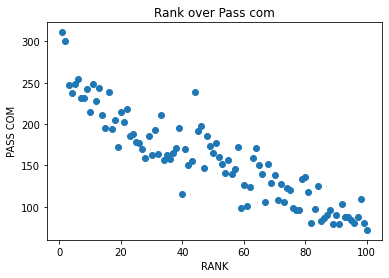

In [47]:
plt.scatter(rank,passcom)
plt.title('Rank over Pass com')
plt.xlabel('RANK')
plt.ylabel('PASS COM')


As you can see our graph is pretty linear, so our two varibles will work 

we will be doing this by hand, we want to note that for a regression of the form, $\hat y = a_0+a_1 x$ 

$$
a_1=\frac{\sum x_i y_i -n \bar x \bar y}{\sum x_i^2 - n\bar x ^2}
$$
and
$$
a_0 = \bar y - a_1 \bar x
$$

In [48]:

def sumation(Data):
  total = 0
  for i in Data:
    total += i
  return total
#the sumation of the data
def squaresum(Data1,Data2):
  total = 0
  for i in range(len(Data1)):
    total += Data1[i]*Data2[i]
  return total
#the sumation of the data times each other

def RegressionFormula(variable,slope, intercept):
   return variable*slope+intercept
  #the regression formula to get the y after you plug in the x,a1, and a0

In [49]:
n = len(rank)
xbar = sumation(rank)/n
ybar = sumation(passcom)/n
xy = squaresum(rank,passcom)
xx = squaresum(rank,rank)

a1 = (xy-n*xbar*ybar)/(xx-n*xbar**2)
a0 = ybar - a1*xbar
#this function will get us our a0 and a1 

In [50]:
print(a1)
a0
#our a1 and a0

-1.704962496249625


243.70060606060605

so our $\hat y = a_0+a_1 x$ is 
$$
\hat y = 243.70060606060605-1.704962496249625x
$$

we will now want to create a function for computing predictions using the regression.

In [51]:
m = stats.linregress(rank,passcom)[0]
b = stats.linregress(rank,passcom)[1]
#these two function get us our m and b 
#the next function get us the y after you plug in a x 
def y(x):
    return(m*x+b)


let say a random quaterback was rank 5 what would the quaterback passing comp look like

In [52]:
#lets use both function to see if we get the same answer 
print(y(5))
RegressionFormula(5,a1,a0)


235.17579357935793


235.17579357935793

looks like both of our function got the same answer. It is predicted that this ranked 5 quarterback would have 235 passing attempts 

## Part 1C:  Compute the sum of the squares error for the predictions.

In [53]:
s = 0
for i in range (0,len(rank)):
    s = s+y(rank[i])-passcom[i]
s

-2.7569058147491887e-12

In [54]:
ss = 0
for i in range (0,len(rank)):
    ss = ss+(y(rank[i])-passcom[i])**2
ss

49150.7980078008

## Part 1D:  Graph the data points and the linear regression together

we will now graph our data points and put our linear regression through it 

Text(0, 0.5, 'PASS COM')

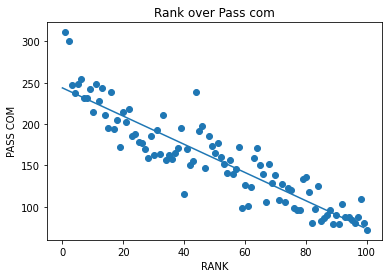

In [61]:
x = np.arange( 0,100,1)
plt.scatter(rank,passcom)
plt.plot(x,y(x))
plt.title('Rank over Pass com')
plt.xlabel('RANK')
plt.ylabel('PASS COM')

# Part 2: NonLinear Regression

## Part 2A:  Find two data columns that show a nonlinear relationship. Hypothesize what that relationship is.

after some testing with our data we finally found two data columns that show a nonlinear relationship. we have chosen Pass attempts as our first column and Pass yards as our second. what passing attempts is how many passes did that quaterback make and Pass yards is how many yards did that quaterback get passing the ball

In [56]:
passatt = data["PASS ATT"]
passyrds = data["PASS YDS"]

Text(0, 0.5, 'PASS YDS')

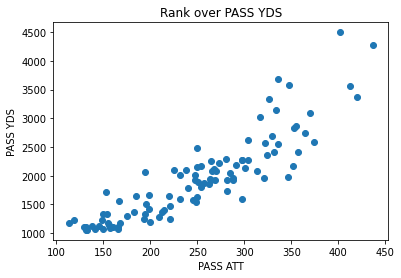

In [62]:
plt.scatter(passatt,passyrds)
plt.title('Rank over PASS YDS')
plt.xlabel('PASS ATT')
plt.ylabel('PASS YDS')

we will now hypothesize what that relationship is. we thought as a group that this mean the more you attempt to throw the ball the more yards youll have

## Part 2B: Following the method outlined in the text, fit the regression to your data.


First I will follow the example in the text.  I will attempt to fit a quadratic to the data.  The text shows that we should solve a system of equations 
$$
\left[
\begin{array}{ccc|c}
n& \sum x_i&\sum x_i^2&\sum y_i\\
\sum x_i&\sum x_i^2&\sum x_i^3&\sum x_i y_i\\
\sum x_i^2 &\sum x_i^3&\sum x_i^4&\sum x_i^2 y_i
\end{array}
\right]
$$
To get the $a_0$, $a_1$, and $a_2$ that will minimize the least squares and return
$$
\hat y = a_0+a_1 x+a_2 x^2
$$

I need some data that this makes sense to do with.

In [58]:
x = sumation(passatt)
x2 = squaresum(passatt,passatt)
x3 = squaresum(passatt**2,passatt)
x4 = squaresum(passatt**3,passatt)

matrix = [[n,x,x2,sumation(passyrds)]
          ,[x,x2,x3,squaresum(passatt,passyrds)]
          ,[x2,x3,x4,squaresum(passatt**2,passyrds)]
          ]

We will now import our code form project part 4

In [59]:

def add(matrix,row2,row,contant):
  newrow=matrix[row2,:]+contant*matrix[row,:]
  newMatrix = []
  for i in range(len(matrix)):
    if i != row2:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(newrow)
  return np.array(newMatrix)


def leadone(matrix,row,column):
  newrow=matrix[row,:]/matrix[row,column]
  newMatrix = []
  for i in range(len(matrix)):
    if i != row:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(newrow)
  return np.array(newMatrix)

def gaussJordan(matrix):
  newMatrix = matrix
  for pivot in range(len(matrix)):
    newMatrix = leadone(newMatrix,pivot,pivot)
    for column in range(0,pivot):
      newMatrix = add(newMatrix,column,pivot,-newMatrix[column,pivot])
    for column in range(pivot+1,len(matrix)):
        newMatrix = add(newMatrix,column,pivot,-newMatrix[column,pivot])
  return newMatrix
#nothing new here

In [60]:
gaussJordan(np.array(matrix))
#using our gaussJordan function to get our equation

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.92546974e+02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -1.32065083e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.88474232e-02]])

 our equation will be 
$$
\hat y = 992.546974-1.32065083 x +.0188474232 x^2
$$

## Part 2C: Graph the data and the regression in the same window.

Text(0, 0.5, 'Pass Attempts')

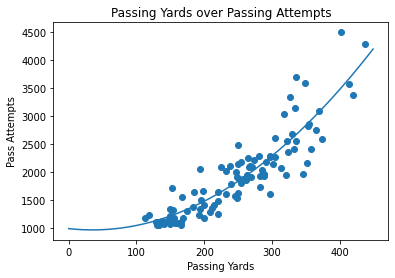

In [45]:
x = np.arange( 0,450,1)
plt.scatter(passatt,passyrds)
plt.plot(x,992.546974-1.32065083 *x +.0188474232 *x**2)
plt.title('Passing Yards over Passing Attempts')
plt.xlabel('Passing Yards')
plt.ylabel('Pass Attempts')